# 栈式LSTM

In [1]:
# 导入包和设置种子
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

np.random.seed(122)

In [2]:
# 将单变量串行拆分为解释变量与被解释变量样本
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

[[101.6 100.8 100.4]
 [100.8 100.4  99.7]
 [100.4  99.7 100. ]
 [ 99.7 100.   99.9]
 [100.   99.9  99.4]
 [ 99.9  99.4  99.9]
 [ 99.4  99.9  99.9]
 [ 99.9  99.9  99.8]
 [ 99.9  99.8  99.6]
 [ 99.8  99.6 100. ]
 [ 99.6 100.   99.4]
 [100.   99.4 100.8]]
[ 99.7 100.   99.9  99.4  99.9  99.9  99.8  99.6 100.   99.4 100.8  99.9]
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[101.16152  100.501045 100.10216   99.795364  99.86305   99.719055
  99.59846   99.86136   99.80344   99.739456  99.673164  99.8948  ]
RMSE = 0.5881440184675766
R2 =  -1.864377668207223
MAE =  0.4090783437093097


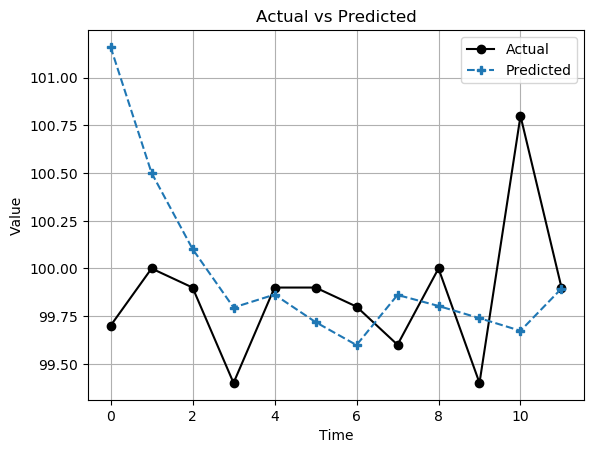

In [3]:
# 导入数据集和确定滞后阶数
data = pd.read_excel(r'C:\Users\Administrator\Desktop\LSTM\anhuicpi.xlsx')
raw_seq = np.array(data.iloc[1:,1])
n_steps = 3
# 拆分为样本
size_train = int(len(raw_seq) * 0.8)
X_train, y_train = split_sequence(raw_seq[0:size_train], n_steps)
X_test, y_test = split_sequence(raw_seq[size_train:len(raw_seq)], n_steps)
print(X_test)
print(y_test)
# 把[样本，滞后阶数]转化为[样本，滞后阶数，特征]
n_features = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], n_features)
# 设定模型
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# 拟合函数
model.fit(X_train, y_train, epochs=200, verbose=0)

# 演示预测
def make_forecasts(model, test, n_steps, n_features):
    forecasts = list()
    for i in range(len(test)):
        x_input = array(X_test[i])
        x_input = x_input.reshape(1, n_steps, n_features)
        # make forecast
        forecast = model.predict(x_input,verbose=0)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

y_predict = make_forecasts(model, X_test, 3, 1)
y_predict = array(y_predict)
y_predict = y_predict.reshape(1,len(y_predict))
y_predict = y_predict[0]
print(y_predict)

rmse = sqrt(mean_squared_error(y_test, y_predict))
print(f'RMSE = {rmse}')
print("R2 = ", metrics.r2_score(y_test, y_predict))  
print("MAE = ", mean_absolute_error(y_test, y_predict))  



import matplotlib.pyplot as plt
plt.plot(y_test, "o-k")
plt.plot(y_predict, "P--")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted')
plt.grid()
plt.show()